#**Aula 4 de Labortório de Aprendizado de Máquina**
#Algoritmo Genético e Redes Neurais

#**1) Usar algoritmo genético para otimizar (minimizar ou maximizar) uma função:**

In [1]:
#instala a biblioteca geneticalgorithm
#ela é uma versão simples de uso de algoritmo genético
!pip install geneticalgorithm

In [2]:
#Parâmetros do algoritmo genético
algorithm_param = {'max_num_iteration': 200,\
                   'population_size':40,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':50}

 The best solution found:
 [0.01613296 0.01021867 0.15473547]

 Objective function:
 0.18108709405224577


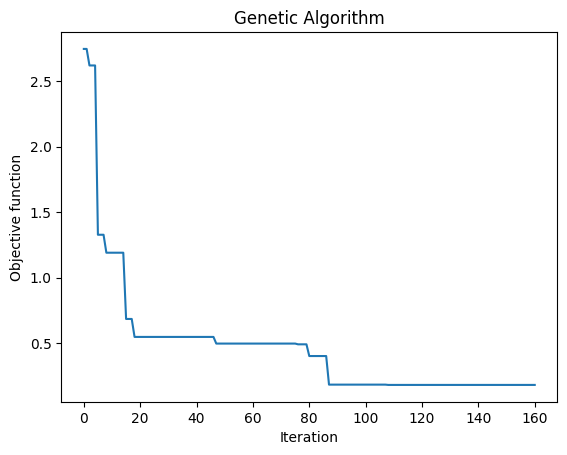

In [3]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

#função a ser minimizada (existem outras em https://pypi.org/project/geneticalgorithm/)
def f(X):
    result = np.sum(X)  #função X0 + X1 + X2
    #result = X[0]**2 + X[1]**2 - X[2]   #função X0^2 + X1^2 - X2
    return result #(se quiser maximizar a função é só colocar o sinal negativa na frente de result)


varbound=np.array([[0,10]]*3) #define o espaço de busca das três variáveis. Todas elas têm o espaço de busca entre 0 e 10

model=ga(function=f,dimension=3,variable_type='real',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

#**2) Usar redes neurais para classificar a base de dados iris:**

In [4]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [5]:
raw_data = datasets.load_iris()
#print(raw_data.DESCR) #Descrição da base de dados

data = pd.DataFrame(np.c_[raw_data["data"],raw_data["target"]], columns=list(raw_data["feature_names"]) + ["target"])
display(data.head())
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
#divide os dados
X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

#configura e treina uma rede neural com 5 neurônios na camada oculta
clf = MLPClassifier(learning_rate_init=1e-2,hidden_layer_sizes=(5), random_state=1, max_iter=200)
clf.fit(X_train, y_train)

output = clf.predict(X_test)
print(f'Acurácia: {100*np.sum(output == y_test)/y_test.shape[0]} %')

Acurácia: 100.0 %


#**3) Combinar redes neurais e algoritmo genético para estimar o preço das casas da base de dados california_housing:**

In [11]:
raw_data = datasets.fetch_california_housing()
#print(raw_data.DESCR) #Descrição da base de dados

data = pd.DataFrame(np.c_[raw_data["data"],raw_data["target"]], columns=list(raw_data["feature_names"]) + ["target"])
display(data.head())
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
#divide os dados em treino, validação e teste
y = data['target'].astype('float')
X = data.copy()
X = data.drop('target', axis=1).astype('float')

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

#70% dos dados são para treino, 15% para validação e 15% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio,random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=0)

In [26]:
#Parâmetros do algoritmo genético #coloquei interações e população pequenos para não demorar tanto a execução
algorithm_param = {'max_num_iteration': 20,\
                   'population_size':20,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 1/20,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':20}

 The best solution found:
 [1.60044525e-01 3.00000000e+01 1.62000000e+02]

 Objective function:
 0.7260898378360933


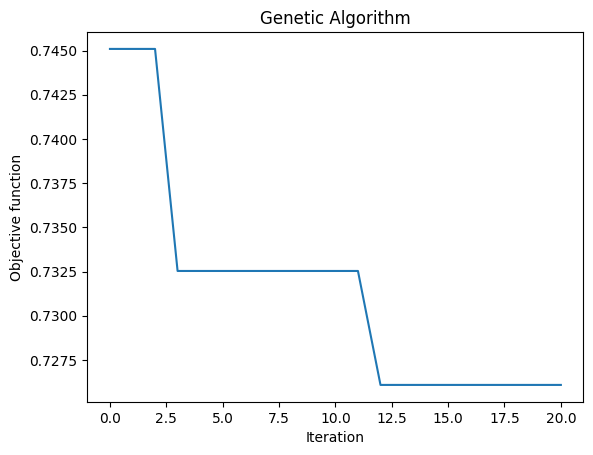

In [27]:
from sklearn.neural_network import MLPRegressor
def redes_neurais(param):
  clf = MLPRegressor(learning_rate_init=param[0],hidden_layer_sizes=(int(param[1])), max_iter=int(param[2]), random_state=1)
  clf.fit(X_train, y_train) #treina com os dados de treino
  output = clf.predict(X_val) #valida com os dados de validação

  return np.sqrt(np.mean((output - y_val)**2)) #Calcula o RMSE

varbound=np.array([[0.0,0.25],[1,50],[50,200]]) #três hiperparâmetros para otimizar: learning_rate_init (0 a 0.25), hidden_layer_sizes (1 a 100) e max_iter (50 a 500)
vartype=np.array([['real'],['int'],['int']])

model=ga(function=redes_neurais,dimension=3,variable_type_mixed=vartype,variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

In [28]:
best_param = model.best_variable
clf = MLPRegressor(learning_rate_init=best_param[0],hidden_layer_sizes=(int(best_param[1])), max_iter=int(best_param[2]), random_state=1)
clf.fit(X_train, y_train) #treina com os dados de treino
output = clf.predict(X_test) #testa como os dados de teste

print(f'RMSE sobre o conjunto de teste: {np.sqrt(np.mean((output - y_test)**2))}')

RMSE sobre o conjunto de teste: 0.7280548251049336
